## SVM (Support Vector Machines)

Support Vector Machines (SVM) are supervised learning models used for classification and regression tasks. SVMs aim to find the optimal hyperplane that separates data points of different classes with the maximum margin.

### Key Concepts

- **Hyperplane:** In an $n$-dimensional space, a hyperplane is a flat, $(n-1)$-dimensional subset that divides the space into two parts.
- **Margin:** The distance between the hyperplane and the nearest data points from each class. SVM maximizes this margin.
- **Support Vectors:** The data points that are closest to the hyperplane and influence its position.

### Mathematical Formulation

Given a set of training data $\{(\mathbf{x}_i, y_i)\}_{i=1}^N$, where $\mathbf{x}_i \in \mathbb{R}^n$ and $y_i \in \{-1, 1\}$, the SVM optimization problem is:

$\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2$

subject to

$y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \quad \forall i$

For non-linearly separable data, SVM uses kernel functions (e.g., linear, polynomial, RBF) to map data into higher-dimensional space and introduces slack variables $\xi_i$:

$\min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i$

subject to

$y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$

where $C$ is a regularization parameter controlling the trade-off between maximizing the margin and minimizing classification error.

### Algorithms

- **Linear SVM:** Finds a linear separating hyperplane.
- **Kernel SVM:** Uses kernel tricks (e.g., RBF, polynomial) for non-linear separation.
- **Soft Margin SVM:** Allows some misclassification for better generalization.

SVMs are widely used due to their effectiveness in high-dimensional spaces and robustness to overfitting, especially with proper kernel and regularization choices.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [20]:
iris = datasets.load_iris()

In [21]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
X = iris.data
y = iris.target
names = iris.target_names
features = iris.feature_names

In [23]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
df = pd.DataFrame(X, columns=features)

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
df['species'] = iris.target

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [29]:
df['species'] = df['species'].replace(to_replace=[0,1,2], value= ['setosa','versicolor','virginica'])

In [30]:
df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [31]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [32]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
import seaborn as sns

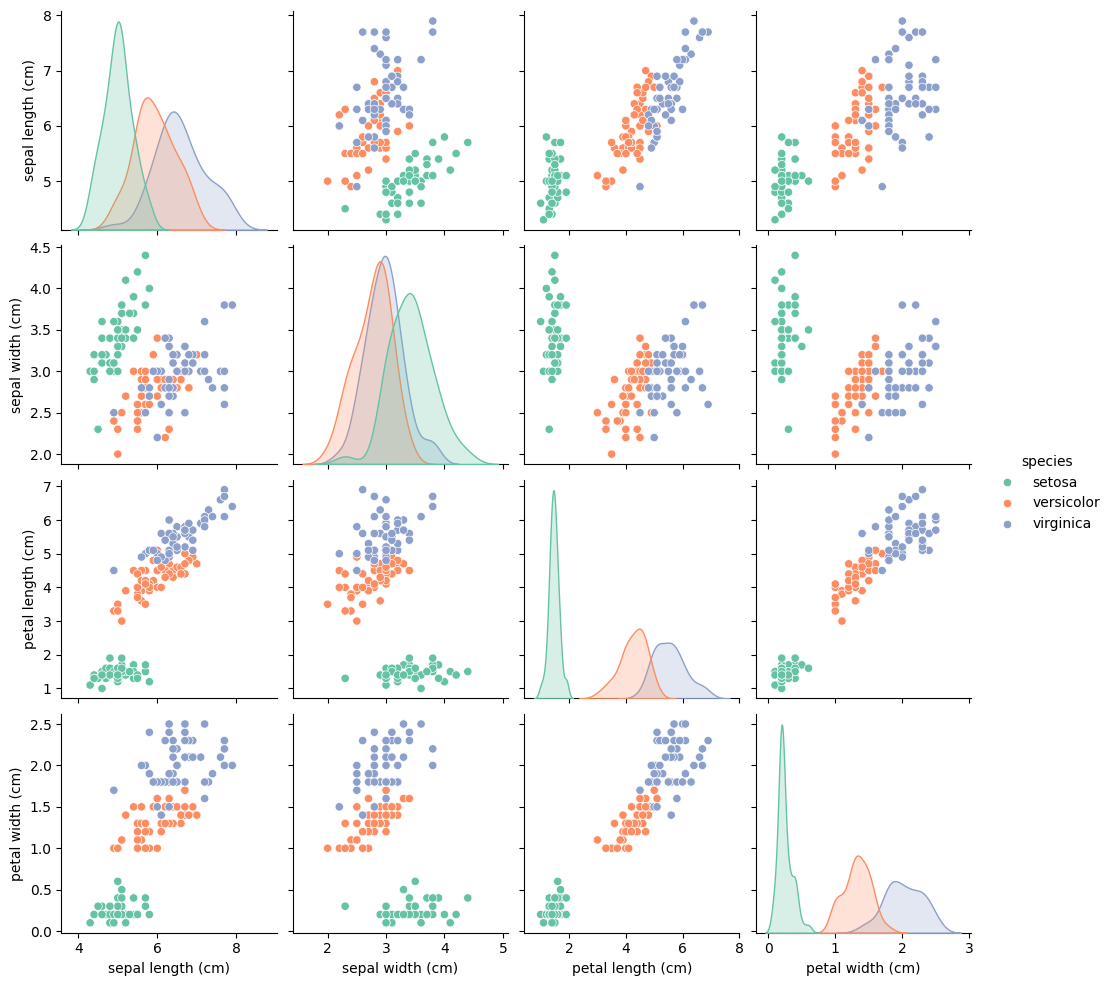

In [37]:
sns.pairplot(data=df, hue="species", palette="Set2")

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 4), (60, 4), (90,), (60,))

In [61]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0)

In [62]:
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [63]:
y_pred = svm.predict(X_test)

In [65]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1])

In [71]:
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix
mean_absolute_error(y_true=y_test,y_pred=y_pred)

0.016666666666666666

In [72]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.9833333333333333

In [73]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  0, 20]])

In [74]:
rbf_svm = SVC(kernel='rbf',random_state=0)

In [75]:
rbf_svm.fit(X_train,y_train)
rbf_pred = rbf_svm.predict(X_test)

In [76]:
accuracy_score(y_test,rbf_pred)

0.9833333333333333

In [77]:
confusion_matrix(y_true=y_test,y_pred=rbf_pred)

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  0, 20]])